DEVELOPER SURVEY ANALYSIS - NOTEBOOK



# Udacity Data Analyst Nanodegree Program
## Project 3. Wrangle and Analyze Twitter Data

author: Andrew Nachtigal  

> #### Table of Contents
> <ul>
> <li><a href="#intro">Introduction</a></li>
> <li><a href="#wrangling">Data Wrangling</a></li>
> <li><a href="#gather">Data Gathering</a></li> 
> <li><a href="#assess">Data Assessment</a></li> 
> <li><a href="#clean">Data Cleaning</a></li> 
> <li><a href="#eda">Exploratory Data Analysis</a></li>
> <li><a href="#conclusions">Conclusions</a></li>
> </ul>

<a id='intro'></a>
## Introduction

This purpose of this project is to gather, assess, and clean data from the WeRateDogs Twitter API as well as provided archive data and image prediction datasets. The data wrangling process is documented in this jupyter notebook and separate report.

__The Data Wrangling Process__

Data wrangling is the process of organizing, cleaning, and transforming data from one format3 into another more appropriate and useful for data analysis. This process consists of data gathering, data assessment, and data cleaning.


__Data Description__

Three datasets were used in this project.

> 1. WeRateDogs Twitter Archive Data: 'twitter_archive_enhanced.csv'
This data set contains information for 2356 tweets containing dog ratings from the WeRateDogs twitter account.
>
>2. Dog Image Prediction Data: 'image_predictions.tsv'
The top three image prediction results from a neural network classification model that predicts dog breed based on image. What breed of dog or other object, animal is present in each tweet according to a neural network.
>
>3. WeRateDogs Twitter API Query: retweet count, favorite count, etc.
Additional WeRateDogs tweet information is queried directly through the twitter developer API. 



Q1. Can we distinguish between data roles and developer roles? 

**What factors are correlated with each group?**


* Individual survey responses may contain any combination of the developer types and therefore contain 
significant variation. 
* For the purpose of analysis, we focus on responses containing either developer or data roles.

Q2. How satisfied are data and developer roles with their jobs?

**plus graphical evaluation**


* Individual 
* For 

Q3. Can we classify the best predictors of job satisfaction through a machine learning model?

**Models evaluated**


* Individual 
* For 

OUTLINE

In [1]:
# import data analysis & graph packages
import pandas as pd
import numpy as np

import zipfile
import glob
import sys
import os
import re

import requests
from io import BytesIO
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# machine learning packages
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, accuracy_score, classification_report


In [3]:
# import survey data

# data directory
folder_name = 'sof-survey-data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# download developer survey file
survey_results_url = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2020.zip'
print(survey_results_url)
response = requests.get(survey_results_url)

# open zip file and return readable and writeable view
zipDoc = zipfile.ZipFile(BytesIO(response.content))

# save extracted zip file
zipDoc.extractall(folder_name)


https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2020.zip


### Plot Visualization Directory

In [4]:
# make plot directory
folder_name = 'plots'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    

In [5]:
# import data
df = pd.read_csv('./sof-survey-data/survey_results_public.csv')
schema = pd.read_csv('./sof-survey-data/survey_results_schema.csv')


In [6]:
# import schema survey questions
schema_fname =  './sof-survey-data/survey_results_schema.csv'
schema_df = pd.read_csv(schema_fname, index_col='Column')
schema = schema_df.QuestionText


**Import helper files**

In [7]:
# import helper files
from helper_functions.helper_functions import print_question_text

# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder

In [8]:
# call function to Display question text for survey questions of interest
question_list = ['DevType', 'JobSat']

for question in question_list:
    print_question_text(question)

Column name does not exist.

Column name does not exist.



### Stackoverflow Survey Data 

**Steps of Data Science Process**  
gather, assess, clean, analyze, model, visualize

### Survey Questions


In [9]:
# adjsut rows and column display
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_colwidth', 200)
#pd.set_option('display.max_columns', 180)

In [10]:
 schema

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

# Q1 Can we distinguish between data roles and developer roles? 

## Developer Roles


In [12]:
# drop NaNs
df = df.dropna(subset=['DevType'], axis=0)


In [13]:
# unique DevType roles
DevRoles = df.DevType.unique()
DevStr = []
for i in range(len(DevRoles)):
    '''Create list of unique developer roles found in survey responses under 'DevType'.
        Iterate over DevType column
    '''
    role = DevRoles[i].split(";")
    DevStr.append(role)
DevTypes = set(list(chain.from_iterable(DevStr)))
DevTypes


{'Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'Scientist',
 'Senior executive/VP',
 'System administrator'}

In [14]:
# specify data and dev role markers
data_roles = ['Data or business analyst', 'Data scientist or machine learning specialist', 'Engineer, data']
dev_roles = ['Developer']


In [15]:
# subset responses including developer roles
df_dev = df[df['DevType'].str.contains('|'.join(dev_roles), na=False) == True].copy(deep=True)

# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [16]:
# drop responses including data roles
df_dev = df_dev[~df_dev['DevType'].str.contains('|'.join(data_roles), na=False) == True]


In [17]:
# shape of developer roles dataset
print('dev roles dataframe contains', np.shape(df_dev)[0], 'rows and', np.shape(df_dev)[1], 'columns.')


dev roles dataframe contains 38631 rows and 61 columns.


## Data Roles


In [18]:
# subset all responses including data
df_data = df[df['DevType'].str.contains('|'.join(data_roles), na=False) == True].copy(deep=True)


In [19]:
# shape of data roles dataframe
print('data roles dataframe contains', np.shape(df_data)[0], 'rows and', 
      np.shape(df_data)[1], 'columns.')


data roles dataframe contains 8726 rows and 61 columns.


### Add Indicator Column for developer and data roles: 'is_data_role'

In [20]:
# set indicator column for data and dev roles
df_data['is_data_role'] = 'data'
df_dev['is_data_role'] = 'dev'


In [21]:
# join data and developer data
df = pd.concat([df_data, df_dev])

# reset index
df = df.reset_index(drop=True)


In [22]:
df.head(3)


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,is_data_role
0,22,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,Indian rupee,...,Appropriate in length,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,10,2,data
1,25,I am a developer by profession,No,NaN,25,Monthly,NaN,NaN,Portugal,European Euro,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,23,18,data
2,30,I am a developer by profession,Yes,NaN,14,Yearly,30000.0,38778.0,United Kingdom,Pound sterling,...,Too long,No,"Information systems, information technology, o...",Express;React.js;Vue.js,Express;Vue.js,A lot less welcome now than last year,37.0,4,2,data


## Data & Developer Role Feature Exploration

In [23]:
df.shape


(47357, 62)

In [24]:
# column datatypes
pd.set_option('display.max_rows', 10)
display(df.dtypes)


Respondent         int64
MainBranch        object
Hobbyist          object
Age              float64
Age1stCode        object
                  ...   
WelcomeChange     object
WorkWeekHrs      float64
YearsCode         object
YearsCodePro      object
is_data_role      object
Length: 62, dtype: object

## Data vs. Dev

* explore statistical/visual similarities and differences
* select features manually

**Features Used**

* Age
* Converted Comp
* EdLevel


# Age

In [25]:
# describe Age column

print(df.Age.describe())

# check for null values
print('dataset contains', df['Age'].isna().sum(), 'nan values')


count    37662.000000
mean        31.805677
std          8.795051
min          1.000000
25%         26.000000
50%         30.000000
75%         36.000000
max        279.000000
Name: Age, dtype: float64
dataset contains 9695 nan values


In [26]:
# unique Age responses
print(list(df.Age.unique()))


[nan, 34.0, 32.0, 53.0, 38.0, 25.0, 28.0, 23.0, 41.0, 36.0, 30.0, 26.0, 27.0, 43.0, 24.0, 35.0, 59.0, 37.0, 51.0, 22.0, 31.0, 42.0, 52.0, 46.0, 48.0, 29.0, 20.0, 40.0, 33.0, 49.0, 57.0, 56.0, 21.0, 54.0, 50.0, 47.0, 55.0, 39.0, 17.0, 44.0, 63.0, 19.0, 45.0, 58.0, 18.0, 73.0, 60.0, 62.0, 16.0, 61.0, 72.0, 67.0, 15.0, 3.0, 64.0, 85.0, 69.0, 66.0, 71.0, 74.0, 80.0, 1.0, 68.0, 13.0, 99.0, 14.0, 65.0, 12.0, 95.0, 75.0, 49.5, 70.0, 26.8, 84.0, 76.0, 32.5, 96.0, 26.5, 24.5, 14.7, 34.5, 77.0, 279.0, 94.0, 22.5, 27.5, 78.0, 7.0, 10.0, 31.5, 39.5, 83.0, 23.4]


## Age Histogram

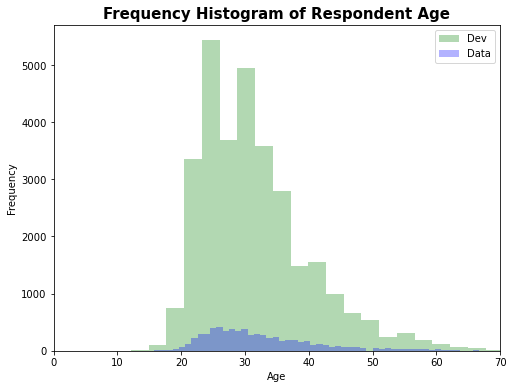

In [27]:
# Age histogram
AgeDev = df.loc[df.is_data_role=='dev', 'Age']
AgeData = df.loc[df.is_data_role=='data', 'Age']

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=100)
fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(AgeDev, **kwargs, color='g', label='Dev')
plt.hist(AgeData, **kwargs, color='b', label='Data')
plt.gca().set(ylabel='Frequency', xlabel='Age')
plt.title('Frequency Histogram of Respondent Age', fontsize= 15, fontweight='bold')
plt.xlim(0,70)
plt.legend();

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.savefig('plots/01-Frequency Histogram of Respondent Age.png', bbox_inches='tight')


In [28]:
# Age: Data mean vs Dev mean 
print('data role mean Age is', round(AgeData.mean(),2))  
print('dev role mean Age is',  round(AgeDev.mean(),2))


data role mean Age is 32.93
dev role mean Age is 31.56


# Age Conclusion ->
* **Mean Age is slightly higher for developers.**

# Converted Comp


In [29]:
# describe Age column
print(df.ConvertedComp.describe())

# check for null values
print('dataset contains', df['ConvertedComp'].isna().sum(), 'nan values')


count    3.327500e+04
mean     1.027512e+05
std      2.264399e+05
min      0.000000e+00
25%      2.422800e+04
50%      5.318400e+04
75%      9.438400e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64
dataset contains 14082 nan values


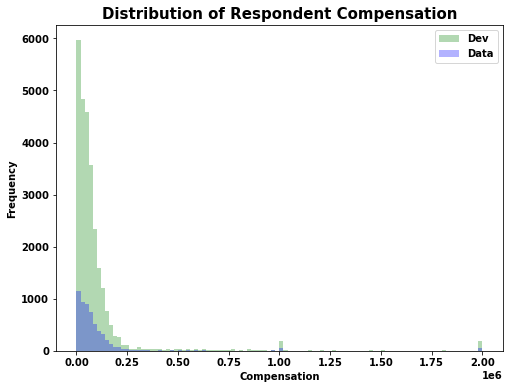

In [30]:
# Distribution of Dev and Data Compensation

CompDev = df.loc[df.is_data_role=='dev', 'ConvertedComp'].dropna()
CompData = df.loc[df.is_data_role=='data', 'ConvertedComp'].dropna()

kwargs = dict(histtype='barstacked', alpha=0.3, bins=100)
fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(CompDev, **kwargs, color='g', label='Dev')
plt.hist(CompData, **kwargs, color='b', label='Data')
plt.gca().set(ylabel='Frequency', xlabel='Compensation')
plt.title('Distribution of Respondent Compensation', fontsize= 15, fontweight='bold')
plt.legend();

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.savefig('plots/02-Distribution of Respondent Compensation.png', bbox_inches='tight')


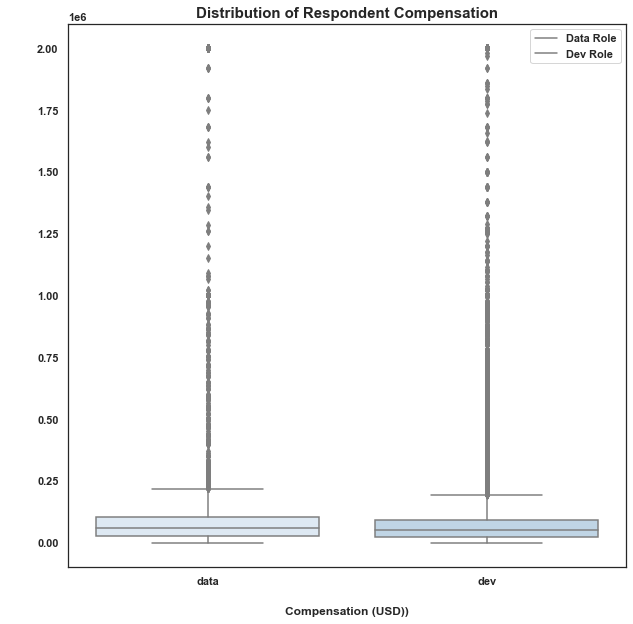

In [47]:
# vertical boxplot
df_z = df[df['ConvertedComp'].notnull()]

sns.set(style="white", palette="Blues", color_codes=True)
plt.figure(figsize=[10, 10])
#df['comp_log'] = np.log(df['ConvertedComp'].values)
#ax = sns.boxplot(x='is_data_role', y='comp_log', data=df)
ax = sns.boxplot(x='is_data_role', y='ConvertedComp', data=df_z)
plt.title('Distribution of Respondent Compensation', fontsize= 15, fontweight='bold')
ax.set_xlabel("Compensation (USD))", labelpad=20, weight='bold', size=12)
ax.set_ylabel(" ", labelpad=20, weight='bold', size=12)
ax.legend(['Data Role', 'Dev Role'])

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.savefig('plots/03-Distribution of Respondent Compensation.png', bbox_inches='tight')


In [32]:
# mean comensation: Data vs Dev
print('data role mean compensation is', round(CompData.mean()))
print('dev role mean compensation is',  round(CompDev.mean()))
print("")
print('Average Data Roles earn more by $', round(CompData.mean()) - round(CompDev.mean()))


data role mean compensation is 115215
dev role mean compensation is 100115

Average Data Roles earn more by $ 15100


# Compensation Conclusion ->
* **Average data roles pay 15% more than Dev roles.**

# Education (EdLevel)

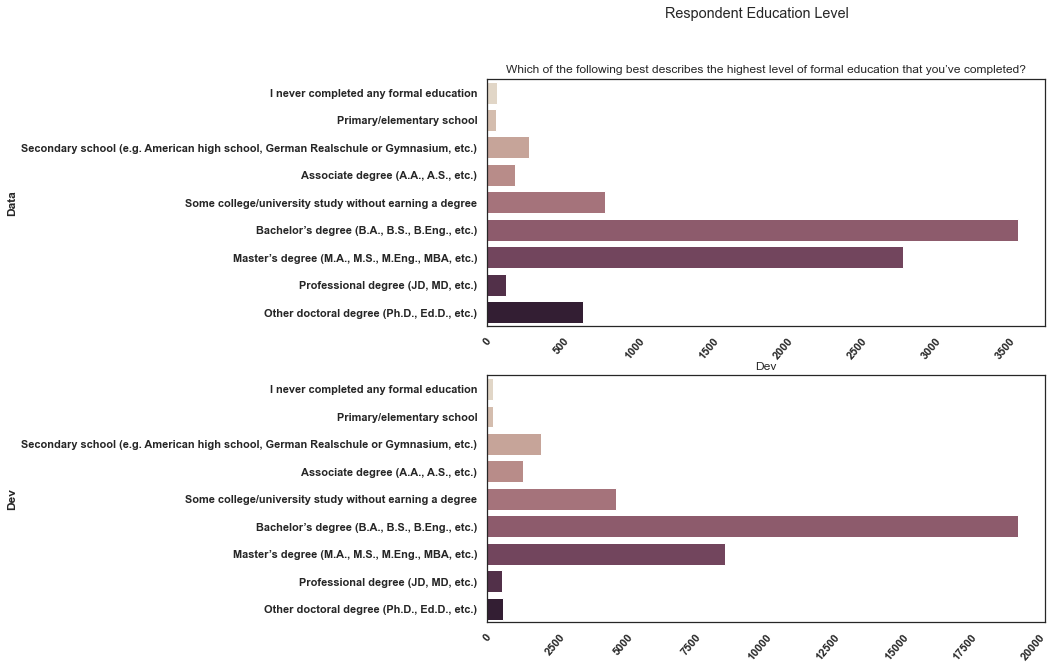

In [48]:
# plot education levels
educ_order = ['I never completed any formal education',
                'Primary/elementary school',
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                'Associate degree (A.A., A.S., etc.)',
                'Some college/university study without earning a degree',
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                'Professional degree (JD, MD, etc.)',
                'Other doctoral degree (Ph.D., Ed.D., etc.)']

# respondent education level
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
fig.suptitle('Respondent Education Level')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Data
plt.subplot(2, 1, 1)
sns.countplot(ax=axes[0], y=df_data.EdLevel, order=educ_order, palette="ch:.25")
axes[0].set_title('Data')
plt.xticks(rotation = 50);
plt.title(schema['EdLevel'])
plt.xlabel(None);
plt.ylabel('Data');

# Dev
plt.subplot(2, 1, 2)
sns.countplot(ax=axes[1], y=df_dev.EdLevel, order=educ_order, palette="ch:.25")
axes[1].set_title('Dev')
plt.xticks(rotation = 50);
plt.xlabel(None);
plt.ylabel('Dev');

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.savefig('plots/04-Respondent Education Level.png', bbox_inches='tight')


**Education Level for Data and Dev Roles: Formal Education Ratio**

In [34]:
# make edlev index key list
edlev_index = ['associate','bachelors', 'no degree', 'masters', 'doctoral', 'elementary', 'professional', 
               'secondary', 'some college']


In [35]:
# data edlev
data_edlev_val = pd.DataFrame(df.loc[df['is_data_role']=='data']['EdLevel'].value_counts(sort=False, dropna=True))
data_edlev_val.sort_index(inplace=True)
# convert data edlev to dictionary
data_edlev_dict = dict(zip(edlev_index, data_edlev_val['EdLevel'].to_list()))


In [36]:
# data total
data_edlev_total = data_edlev_val.sum()
# data bachelor's
data_bach_ratio = data_edlev_dict['bachelors'] / data_edlev_total
# data pgrad
data_pgrad_ratio = (sum([data_edlev_dict.get(k) for k in ["masters", "doctoral", 
                                                          "professional"]])) / data_edlev_total


In [37]:
# dev edlev
dev_edlev_val = pd.DataFrame(df.loc[df['is_data_role']=='dev']['EdLevel'].value_counts(sort=False, dropna=True))
dev_edlev_val.sort_index(inplace=True)
# convert dev edlev to dictionary
dev_edlev_dict = dict(zip(edlev_index, dev_edlev_val['EdLevel'].to_list()))


In [38]:
# dev total
dev_edlev_total = dev_edlev_val.sum()
# dev bachelor's
dev_bach_ratio = dev_edlev_dict['bachelors'] / dev_edlev_total
# dev pgrad
dev_pgrad_ratio = (sum([dev_edlev_dict.get(k) for k in ["masters", "doctoral", 
                                                        "professional"]])) / dev_edlev_total


In [39]:
# formal education ratios
print('data bachelors ratio is:', round(data_bach_ratio[0],4))
print('data postgrad ratio is:', round(data_pgrad_ratio[0],4))
print('dev bachelors ratio is:', round(dev_bach_ratio[0],4))
print('dev postgrad ratio is:', round(dev_pgrad_ratio[0],4))


data bachelors ratio is: 0.4177
data postgrad ratio is: 0.4182
dev bachelors ratio is: 0.5143
dev postgrad ratio is: 0.2616


# Education Conclusion ->
* **College degrees are very common among both data and developer roles.**
* **Bachelor's degrees dominate among developers while post-graduate degrees are twice as common for data roles.**

In [40]:
df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,is_data_role
0,22,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,Indian rupee,...,Appropriate in length,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,10,2,data
1,25,I am a developer by profession,No,NaN,25,Monthly,NaN,NaN,Portugal,European Euro,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,23,18,data


# Q2 How satisfied are data and developer roles with their jobs?

In [42]:
# describe job satisfaction column: count, unique, nan rows, etc
print(df.JobSat.describe())

# check for null values in jobsat column
print('dataset contains', df['JobSat'].isna().sum(), 'nan values')


count              43043
unique                 5
top       Very satisfied
freq               13825
Name: JobSat, dtype: object
dataset contains 4314 nan values


In [62]:
# Job Satisfaction Percent - All
total = df['JobSat'].count()

jobsat_percent = df['JobSat'].value_counts()/total

jobsat_percent.round(2)

Very satisfied                        0.32
Slightly satisfied                    0.31
Slightly dissatisfied                 0.16
Neither satisfied nor dissatisfied    0.13
Very dissatisfied                     0.08
Name: JobSat, dtype: float64

## Conclusion ->
63% of respondents are satisfied, while 37% are not.


In [ ]:
# Job Satisfaction Percent - All
total = df['JobSat'].count()

jobsat_percent = df['JobSat'].value_counts()/total

jobsat_percent.round(2)

In [66]:
data_jobsat = pd.DataFrame(df.loc[df['is_data_role']=='data']['JobSat'])#.value_counts(sort=False, dropna=True))

data_jobsat

,JobSat
0,Slightly dissatisfied
1,Neither satisfied nor dissatisfied
2,Slightly dissatisfied
3,Slightly satisfied
4,Neither satisfied nor dissatisfied
...,...
8721,NaN
8722,NaN
8723,NaN
8724,NaN


**Job Satisfaction by Developer Roles**

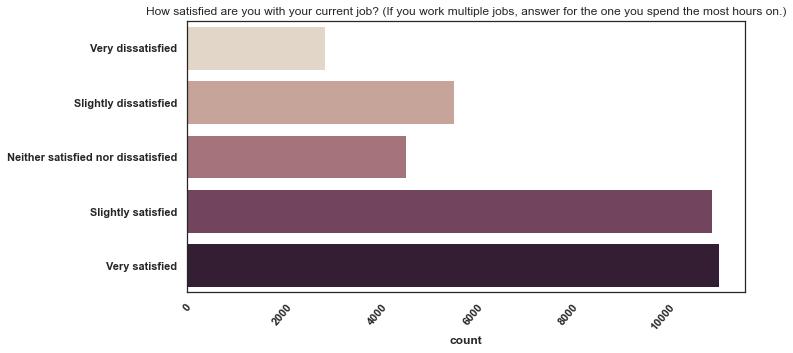

In [49]:
# plot job satisfaction for developer roles
jobsat_order = ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 
                'Slightly satisfied', 'Very satisfied']

plt.figure(figsize = (10, 5))

sns.countplot(y = df_dev.JobSat, order = jobsat_order, palette = "ch:.25")
plt.xticks(rotation = 50);
plt.title(schema['JobSat'])
plt.ylabel(None);

plt.savefig('plots/05-Job Satisfaction-Dev.png', bbox_inches='tight')


**Job Satisfaction by Data Roles**

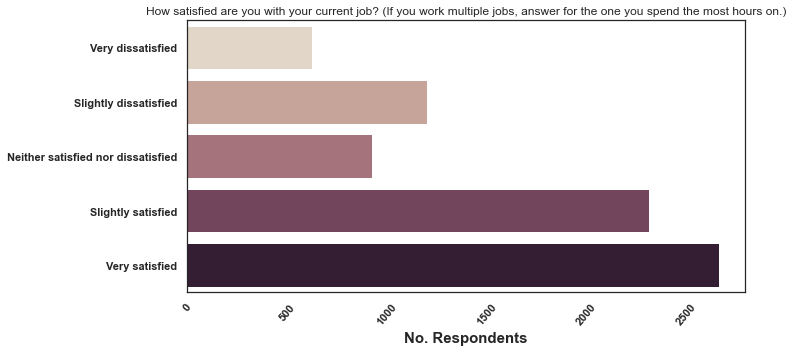

In [50]:
# plot job satisfaction for data roles
jobsat_order = ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 
                'Slightly satisfied', 'Very satisfied']

plt.figure(figsize = (10, 5))

sns.countplot(y = df_data.JobSat, order = jobsat_order, palette = "ch:.25")
plt.xticks(rotation = 50);
plt.title(schema['JobSat'])
plt.xlabel('No. Respondents', size = 15)
plt.ylabel(None);

plt.savefig('plots/06-Job Satisfaction-Data Roles.png', bbox_inches='tight')


In [46]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
df.head(1)

In [ ]:
break

# Q3 Can we classify good predictors of job satisfaction with machine learning?


**FEATURE MODELING**
* remove unemployed
* method for determining useful features / feature selection
    * trim features by intuition
    * programmaticaly remove uncorrelated columns
* parse feature columns into useful types
* expand columns with list-like structures
* consider distribution of numeric features
* manage missing values
* encode categorical features

In [ ]:
# import data
df = pd.read_csv('./sof-survey-data/survey_results_public.csv')


In [ ]:
df.head(3)

In [ ]:
# all features
df.columns


# DATA PREPARATION
* drop unemployed responses
* manually drop feature columns that are not of interest
* drop NaN values  
* encode categorical feature columns
* drop string object columns
* reset index


In [ ]:
# drop unemployed responses
df = df[df.Employment.isin(['Employed full-time', 'Independent contractor, freelancer, or self-employed', 
                            'Employed part-time'])]
 
# narrow feature set: drop column features that are not of interest
df = df[['Hobbyist', 'Age', 'Age1stCode','ConvertedComp','EdLevel','JobSat','JobFactors','JobSeek',
         'WorkWeekHrs','YearsCode','YearsCodePro']]


In [ ]:
df.shape

### Model Features

In [ ]:
list(df.columns)

In [ ]:
# column datatypes
pd.set_option('display.max_rows', 75)
display(df.dtypes)


## Categorical Feature Mappings


In [ ]:
# categorical variable responses strings

EdLevel_strs = ['I never completed any formal education',
                'Primary/elementary school',
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                'Associate degree (A.A., A.S., etc.)',
                'Some college/university study without earning a degree',
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                'Professional degree (JD, MD, etc.)',
                'Other doctoral degree (Ph.D., Ed.D., etc.)']

JobSeek_strs = ['I am not interested in new job opportunities',
                 'I’m not actively looking, but I am open to new opportunities',
                 'I am actively looking for a job']


# Hobbyist

In [ ]:
# describe data
print(df.Hobbyist.describe())

# check for null values
print('dataset contains', df['Hobbyist'].isna().sum(), 'nan values')


In [ ]:
# 'Hobbyist' responses
print(list(df.Hobbyist.unique()))


In [ ]:
# convert 'Hobbyist' to yes=1 or no=0
df['Hobbyist_bin'] = df.Hobbyist.map(dict(Yes=1, No=0))


In [ ]:
df.Hobbyist_bin.head()


# Age

In [ ]:
# describe age column
print(df.Age.describe())

# check for null values in jobsat column
print('dataset contains', df['Age'].isna().sum(), 'nan values')


In [ ]:
# 'Age' unique responses
print(list(df.Age.unique()))


In [ ]:
# drop NaNs
df = df.dropna(subset=['Age'], axis=0)


In [ ]:
df.shape


# Age1stCode

In [ ]:
# drop nulls Years Coding responses
df = df[df['Age1stCode'].notnull()]


In [ ]:
# replace 'Less than 1 year' with 0; 'More than 50 years' with 51
df['Age1stCode'] = df['Age1stCode'].str.replace('Younger than 5 years', '4')
df['Age1stCode'] = df['Age1stCode'].str.replace('Older than 85', '85')


In [ ]:
# convert 'Age1stCode' to type integer
df['Age1stCode'] = df['Age1stCode'].astype(str).astype(int)


In [ ]:
df.shape


# ConvertedComp


In [ ]:
# drop nulls from ConvertedComp column
df = df[df['ConvertedComp'].notnull()]

df['ConvertedComp'].head()


In [ ]:
df.shape


# EdLevel

In [ ]:
# drop nan job factors
df = df.dropna(subset=['EdLevel'], axis=0)


In [ ]:
# create ordinal encoding for education level

EdLevel_dict = {'I never completed any formal education':1,
               'Primary/elementary school':2,
               'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':3,
               'Associate degree (A.A., A.S., etc.)': 4,
               'Some college/university study without earning a degree':5,
               'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':6,
               'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':7,
               'Professional degree (JD, MD, etc.)':8,
               'Other doctoral degree (Ph.D., Ed.D., etc.)':9}


In [ ]:
# import helper files
from helper_functions.helper_functions import replace_values_in_string   


In [ ]:
# encode EdLevel as integer
df['EdLevel_encode'] = replace_values_in_string(df.EdLevel, EdLevel_dict)


In [ ]:
# inspect data
df.EdLevel_encode.head()


In [ ]:
df.shape


# Target Variable: Job Satisfaction 
* simplified binary classification problem
* ordinal classification


In [ ]:
# check for NaNs
df['JobSat'].isna().sum()


In [ ]:
# drop NaNs
df = df.dropna(subset=['JobSat'], axis=0)


In [ ]:
# encode job satisfaction string values to encoded categorical values 
JobSat_dict = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied' : 2,
    'Very dissatisfied' : 1
    }


In [ ]:
# encode JobSat
df['JobSat_encode'] = replace_values_in_string(df.JobSat, JobSat_dict)


In [ ]:
df['JobSat_encode'].head()


In [ ]:
#  Encode JobSat feature column as a Binary classification where
# 'Very satisfied,   'Slightly satisfied' = 1
# 'Neither satisfied nor dissatisfied','Slightly dissatisfied','Very dissatisfied' = 0

JobSat_bin_map = {
    'Very satisfied': 1,
    'Slightly satisfied': 1,
    'Neither satisfied nor dissatisfied': 0,
    'Slightly dissatisfied' : 0,
    'Very dissatisfied' : 0
    }

df['JobSat_encode_bin'] = df['JobSat'].replace(JobSat_bin_map)


In [ ]:
df['JobSat_encode_bin'].head()


In [ ]:
df.shape

# JobSeek

In [ ]:
# drop NaNs
df = df.dropna(subset=['JobSeek'], axis=0)


In [ ]:
# jobseek encoding dictionary
JobSeek_dict = {'I am actively looking for a job': 0,
                 'I’m not actively looking, but I am open to new opportunities': 1,
                 'I am not interested in new job opportunities': 2}


In [ ]:
# encode JobSeek as integer
df['JobSeek_encode'] = replace_values_in_string(df.JobSeek, JobSeek_dict)


In [ ]:
df['JobSeek_encode']


In [ ]:
df.shape


# WorkWeekHrs
* remove NaNs
* impute NaNs

In [ ]:
# drop NaN WorkWeekHrs
df = df.dropna(subset=['WorkWeekHrs'], axis=0)


In [ ]:
df.shape


# YearsCode

In [ ]:
# drop nulls Years Coding responses
df = df[df['YearsCode'].notnull()]


In [ ]:
# replace 'Less than 1 year' with 0
# replace 'More than 50 years' with 51
df['YearsCode'] = df['YearsCode'].str.replace('Less than 1 year', '0')
df['YearsCode'] = df['YearsCode'].str.replace('More than 50 years', '51')


In [ ]:
# convert 'Age1stCode' to type integer
df['YearsCode'] = df['YearsCode'].astype(str).astype(int)


In [ ]:
df['YearsCode'].head()


In [ ]:
df.shape


# YearsCodePro

In [ ]:
# drop nulls Years Coding responses
df = df[df['YearsCodePro'].notnull()]


In [ ]:
# replace 'Less than 1 year' with 0
# replace 'More than 50 years' with 51
df['YearsCodePro'] = df['YearsCodePro'].str.replace('Less than 1 year', '0')
df['YearsCodePro'] = df['YearsCodePro'].str.replace('More than 50 years', '51')


In [ ]:
# convert 'Age1stCode' to type integer
df['YearsCodePro'] = df['YearsCodePro'].astype(str).astype(int)


In [ ]:
df['YearsCodePro'].head()


In [ ]:
df.shape


RESET INDEX

In [ ]:
# reset index
df = df.reset_index(drop=True)


PRUNE DATASET FOR MODELING 


In [ ]:
list(df.columns)


In [ ]:
# drop original feature columns
df.drop(['Hobbyist', 'EdLevel', 'JobSat','JobFactors','JobSeek', 'JobSat_encode'], axis=1, inplace=True)


In [ ]:
list(df.columns)


In [ ]:
df.head(2)


In [ ]:
df.shape


## Feature Preprocessing

1. data standardization

 * StandardScalar transformer shifts each feature such that they have a 0-mean and a unit standard deviation.
 
   
* numerical feature scaling / feature normalizing
* pipeline to chain processing and training

In [ ]:
# display model diagram
set_config(display='diagram')


In [ ]:
# numerical columns
numerical_columns = ["Age", "Age1stCode", "ConvertedComp", "WorkWeekHrs", 'YearsCode', "YearsCodePro", 
                    'Hobbyist_bin', 'EdLevel_encode', 'JobSat_encode_bin', 'JobSeek_encode']
df[numerical_columns].head(2)


In [ ]:
data_numeric = df[numerical_columns]
data_numeric.head(2)


In [ ]:
# set target 
y = df['JobSat_encode_bin']
# drop target variable from feature df
X = df.drop(['JobSat_encode_bin'], axis=1)


In [ ]:
# create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape


**MODEL FITTING WITH PREPROCESSING**

In [ ]:
# data transform: scale data with StandardScalar -> learn scaling from data
scaler = StandardScaler()
scaler.fit(X_train)


Compute the mean and standard deviation for each feature, and store as model states.

In [ ]:
# mean learned from data
scaler.mean_


In [ ]:
# scale (standard deviation) learned from data
scaler.scale_


Perform data transformation: subtract mean and divide by standard deviation

In [ ]:
# perform data (X) transformation
X_train_scaled = scaler.transform(X_train)
X_train_scaled


In [ ]:
# fit and transform at once...
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled


In [ ]:
# convert to df and inspect statistics: mean ~ 0 and std ~ 1
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()


In [ ]:
# visualize effects of StandardScalar
num_points_to_plot = 300

plt.style.use('classic')

sns.jointplot(data=X_train[:num_points_to_plot], x="Age",
              y="WorkWeekHrs", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'Age' vs 'WorkWeekHrs' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=X_train_scaled[:num_points_to_plot], x="Age",
              y="WorkWeekHrs", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'Age' vs 'WorkWeekHrs' \nafter StandardScaler", y=1.1)

plt.savefig('plots/07-visualize effects of StandardScalar.png', bbox_inches='tight')


# Logistic Regression Classifer Model
**Combine sequential operations with Pipeline.**

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model


In [ ]:
# check the name of each step of model
model.named_steps


In [ ]:
# time to fit model
start = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start
elapsed_time


In [ ]:
# predict y given a test set
predicted_target = model.predict(X_test)
predicted_target[:5]


In [ ]:
# check the score of the predictive pipeline 
model_name = model.__class__.__name__
score = model.score(X_test, y_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")


In [ ]:
# compare to model with unscaled features
model = LogisticRegression()
start = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start


In [ ]:
#
model_name = model.__class__.__name__
score = model.score(X_test, y_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")


**Conclusion >>**  
Scaling data before training a model improved computational performance. Number of iterations and training time decreased.

## Model Validation
* cross-validation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())


In [ ]:
# import numerical data
numerical_columns = ["Age", "Age1stCode", "ConvertedComp", "WorkWeekHrs", "YearsCodePro"]
df[numerical_columns].head()


In [ ]:
# cross validation takes a parameter cv that defines the splitting strategy
%time
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, y, cv=5)
cv_result


In [ ]:
# extract scores computed on test fold of each cv round
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)


# Random Forest Classifer Model

In [ ]:
# set target variable
y = df['JobSat_encode_bin']
# drop target variable from feature df
X = df.drop(['JobSat_encode_bin'], axis=1)


In [ ]:
# create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape


In [ ]:
# instantiate random forest classifier and fit data
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


In [ ]:
%%time
rf_clf.fit(X_train, y_train)


In [ ]:
# check oob score
rf_clf.oob_score_


In [ ]:
# hyperparameter tuning for rf using GridSearchCV and fit data
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [ ]:
# instantiate grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [ ]:
%%time
grid_search.fit(X_train, y_train)


In [ ]:
grid_search.best_score_


In [ ]:
rf_best = grid_search.best_estimator_
rf_best


BEST ESTIMATOR
* max_depth = 3
* min_samples_leaf=5 
* n_estimators=200

**Visualize Random Forest**


In [ ]:
from sklearn.tree import plot_tree


In [ ]:
# plot trees
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Satisfied', 
                                                                         "Not Satisfied"],filled=True);

plt.savefig('plots/08-plot-random-forest-trees.png', bbox_inches='tight')


In [ ]:
# plot trees
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Satisfied', "Not Satisfied"],filled=True);

plt.savefig('plots/09-plot-random-forest-trees.png', bbox_inches='tight')


In [ ]:
# sort data by feature importance
rf_best.feature_importances_


In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})


In [ ]:
imp_df.sort_values(by="Imp", ascending=False)


**Random Forest Model Conclusion**  
Job seeking & Worker Compensation features are more indicative of job satisfaction than other features.
